In [ ]:

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

import os

In [2]:
train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")
train.shape, test.shape

((88832, 28), (26929, 27))

In [3]:
# train.isnull().sum() # f_2 f_3 f_5 f_6 f_8 f_9
train.head()

,ID,f_1,f_2,f_3,f_4_1,f_4_2,f_4_3,f_4_4,f_5,f_6,f_7_1,f_7_2,f_7_3,f_8,f_9,f_10_1,f_10_2,f_11_1,f_11_2,f_11_3,f_11_4,f_11_5,f_11_6,f12,f_13_1,f_13_2,f_13_3,output
0,MTgxYTM4OWItMDU4Ny00Mzg3LWFkZDktODFmNDQ3YzYyNDVk,1,1.0,45.0,0,0,0,1,3.0,1.0,1,0,0,2.0,1.5,0,1,1,0,0,0,0,0,11.53,1,0,0,0
1,YTFlMTlhOGUtNjZmOC00M2ZhLTkxNjktNDA0NmRlZTQwMzM3,1,2.0,120.0,1,0,0,0,3.0,3.0,1,0,0,2.0,1.5,1,0,1,0,0,0,0,0,0.00,0,0,1,1
2,ZTQ1MzAwY2YtY2IwMy00MTI5LWFkMTYtM2U5MDRjMjliNGUz,1,1.0,80.0,0,0,0,1,NaN,1.0,1,0,0,1.0,3.0,0,1,1,0,0,0,0,0,4.06,0,0,1,0
3,NDFiYjFiMzgtZDc0NC00NWU1LWIxNjMtNzI1M2JjODFiMjU5,1,1.0,80.0,0,0,0,1,2.0,3.0,1,0,0,2.0,1.5,0,1,1,0,0,0,0,0,0.00,1,0,0,0
4,N2I3ZWYzNjItNzhkMy00MTcyLTliOGItZDNhZDBiYjM1OWMy,1,1.0,150.0,0,0,0,1,NaN,2.0,1,0,0,2.0,3.0,0,1,1,0,0,0,0,0,5.61,1,0,0,0


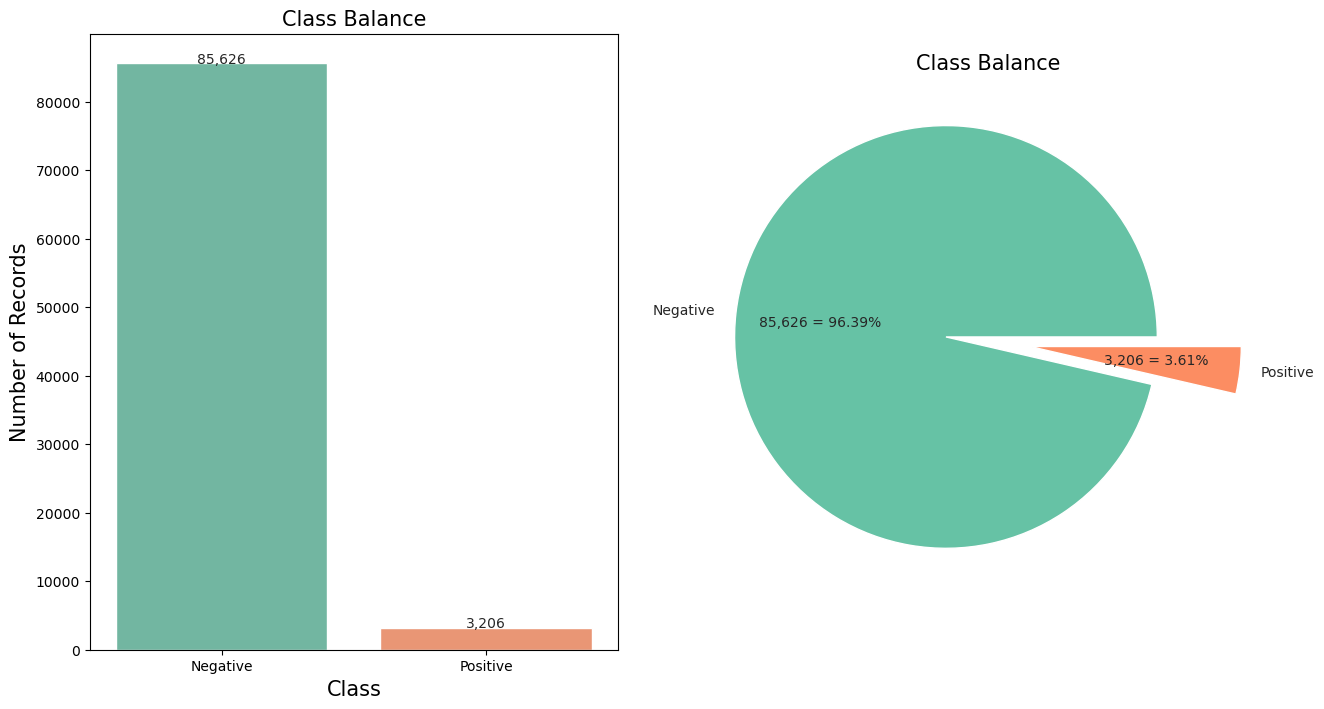

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

sns.set_style('darkgrid')
sns.set_palette('Set2')

counts = pd.DataFrame(train["output"].value_counts()).rename(index={0: "Negative", 1: "Positive"})
_ = sns.barplot(x=counts.index, y=counts.output, ax=axs[0])
for p in axs[0].patches:
    axs[0].text(x=p.get_x()+(p.get_width()/2), y=p.get_height(), s="{:,d}".format(round(p.get_height())), ha="center")
_ = axs[0].set_title("Class Balance", fontsize=15)
_ = axs[0].set_ylabel("Number of Records", fontsize=15)
_ = axs[0].set_xlabel("Class", fontsize=15)

data = [
    train[(train["output"] == 0)]["ID"].count(),
    train[(train["output"] == 1)]["ID"].count()
]
_ = axs[1].pie(
    data, labels=["Negative", "Positive"],
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(data)/100, x),
    explode=[0.20] * 2, 
    colors=sns.color_palette("Set2")[0:2],
)
_ = axs[1].set_title("Class Balance", fontsize=15)

we see skewed class balance.The class balance is skewed in favor of the negative class ~ 9.6:0.4. In this case, we have 3.61% of our training data that represents the positive class.


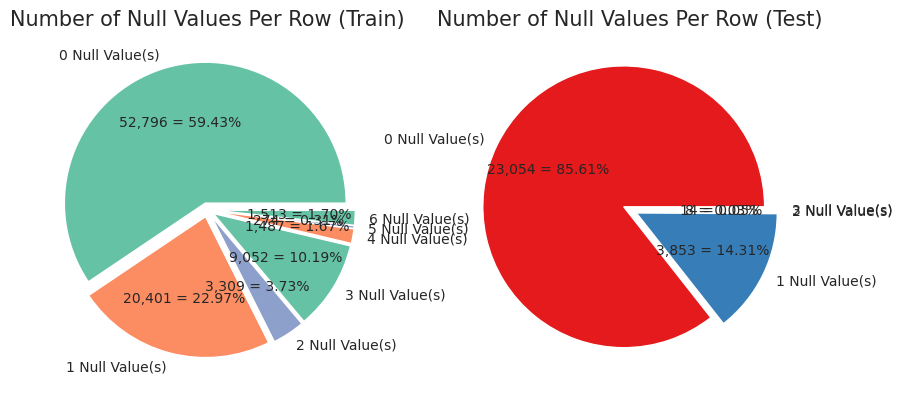

In [5]:
train["null_count"] = train.isnull().sum(axis=1)
counts = train.groupby("null_count")["ID"].count().to_dict()
null_data = {"{} Null Value(s)".format(k) : v for k, v in counts.items() if k < 8}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

axs = axs.flatten()

_ = axs[0].pie(
    x=list(null_data.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_data.values())/100, x),
    explode=[0.05] * len(null_data.keys()), 
    labels=null_data.keys(), 
    colors=sns.color_palette("Set2")[0:3],
)
_ = axs[0].set_title("Number of Null Values Per Row (Train)", fontsize=15)

test["null_count"] = test.isnull().sum(axis=1)
counts = test.groupby("null_count")["ID"].count().to_dict()
null_data = {"{} Null Value(s)".format(k) : v for k, v in counts.items() if k < 8}

_ = axs[1].pie(
    x=list(null_data.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_data.values())/100, x),
    explode=[0.05] * len(null_data.keys()), 
    labels=null_data.keys(), 
    colors=sns.color_palette("Set1")[0:3],
)
_ = axs[1].set_title("Number of Null Values Per Row (Test)", fontsize=15)

train = train.drop("null_count", axis=1)
test = test.drop("null_count", axis=1)

In [6]:
train.isnull().sum()

ID             0
f_1            0
f_2         1736
f_3         2808
f_4_1          0
f_4_2          0
f_4_3          0
f_4_4          0
f_5        23992
f_6        16204
f_7_1          0
f_7_2          0
f_7_3          0
f_8        16010
f_9         9821
f_10_1         0
f_10_2         0
f_11_1         0
f_11_2         0
f_11_3         0
f_11_4         0
f_11_5         0
f_11_6         0
f12            0
f_13_1         0
f_13_2         0
f_13_3         0
output         0
dtype: int64

**From the Columns and instructions given regariding data it's clear that**

f_4, f_7, f_10, f_11, f_13 are all One Hot Encoded

* f_4 had 4 categories
* f_7 had 3 categories
* f_10 had 2 categories
* f_11 had 6 categories
* f_13 had 3 categories

* Categorical features are already one hot encoded in the dataset. For example, if feature f_x has 3 categories, then 3 binary features f_x_1, f_x_2, f_x_3 are created to represent the same.

* Features f_5 and f_13_1, f_13_2, f_13_3 are related to the product (house) and rest of the features are about the lead.

# Assumptions
From experience and based on the variety of house based datasets i saw it seems like f_5 which has 5 categories might be the number of bedrooms or rooms and f_13 might be number of bathrooms

In [7]:
#Let's look at the continuous variable
cont_variable=["f_1", "f_2", "f_3", 'f12']
train[cont_variable].describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

,f_1,f_2,f_3,f12
count,88832.000000,87096.000000,86024.000000,88832.000000
mean,1.366005,1.506453,73.724867,83.503321
std,1.136372,1.414442,384.795633,243.036619
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.000000,4.640000
50%,1.000000,1.000000,60.000000,15.820000
75%,1.000000,2.000000,90.000000,59.990000
90%,2.000000,2.000000,120.000000,132.230000
95%,3.000000,3.000000,150.000000,408.024500
max,23.000000,31.000000,100000.000000,5168.380000


In [8]:
quant = 0.9
f_1 = train.loc[train['f_1']>train['f_1'].quantile(quant)]
f_1_index = f_1[f_1['output']==1].index

f_2 = train.loc[train['f_2']>train['f_2'].quantile(quant)]
f_2_index = f_2[f_2['output']==1].index

f_3 = train.loc[train['f_3']>train['f_3'].quantile(quant)]
f_3_index = f_3[f_3['output']==1].index

f12 = train.loc[train['f12']>train['f12'].quantile(quant)]
f12_index = f12[f12['output']==1].index

temp = []
for i in [f_1_index , f_2_index,f_3_index,f12_index]:
    for j in i:
        temp.append(j)
        
len(np.unique(temp)), len(f_1_index),len(f_2_index),len(f_3_index),len(f12_index)

(1329, 252, 819, 285, 403)

In [9]:
train[train[cont_variable]>train[cont_variable].quantile(0.9)]

,ID,f_1,f_2,f_3,f_4_1,f_4_2,f_4_3,f_4_4,f_5,f_6,f_7_1,f_7_2,f_7_3,f_8,f_9,f_10_1,f_10_2,f_11_1,f_11_2,f_11_3,f_11_4,f_11_5,f_11_6,f12,f_13_1,f_13_2,f_13_3,output
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Imputing

In [10]:
train[["f_2", "f_3", "f_5" ,"f_6" ,"f_8", "f_9"]].describe()

,f_2,f_3,f_5,f_6,f_8,f_9
count,87096.000000,86024.000000,64840.000000,72628.000000,72822.000000,79011.000000
mean,1.506453,73.724867,2.340793,1.968759,1.669571,1.749010
std,1.414442,384.795633,1.117066,0.693368,0.655323,1.091284
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,40.000000,2.000000,2.000000,1.000000,1.000000
50%,1.000000,60.000000,3.000000,2.000000,2.000000,2.000000
75%,2.000000,90.000000,3.000000,2.000000,2.000000,3.000000
max,31.000000,100000.000000,5.000000,5.000000,4.000000,3.000000


In [11]:
train[["f_2", "f_3", "f_5" ,"f_6" ,"f_8", "f_9"]].mode()

,f_2,f_3,f_5,f_6,f_8,f_9
0,1.0,50.0,3.0,2.0,2.0,3.0


In [12]:
train[["f_2", "f_3", "f_5" ,"f_6" ,"f_8", "f_9"]].mean()

f_2     1.506453
f_3    73.724867
f_5     2.340793
f_6     1.968759
f_8     1.669571
f_9     1.749010
dtype: float64

In [13]:
train['f_2'] = train['f_5'].fillna(1.0)
train['f_3'] = train['f_5'].fillna(73) # mean
train['f_5'] = train['f_5'].fillna(3.0)
train['f_6'] = train['f_5'].fillna(2.0)
train['f_8'] = train['f_5'].fillna(2.0)
train['f_9'] = train['f_5'].fillna(3.0)

In [14]:
train[["f_2", "f_3", "f_5" ,"f_6" ,"f_8", "f_9"]].describe()

,f_2,f_3,f_5,f_6,f_8,f_9
count,88832.000000,88832.000000,88832.000000,88832.000000,88832.000000,88832.000000
mean,1.978668,21.424633,2.518833,2.518833,2.518833,2.518833
std,1.124819,31.387545,0.998239,0.998239,0.998239,0.998239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,73.000000,3.000000,3.000000,3.000000,3.000000
max,5.000000,73.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
import warnings
warnings.filterwarnings("ignore")

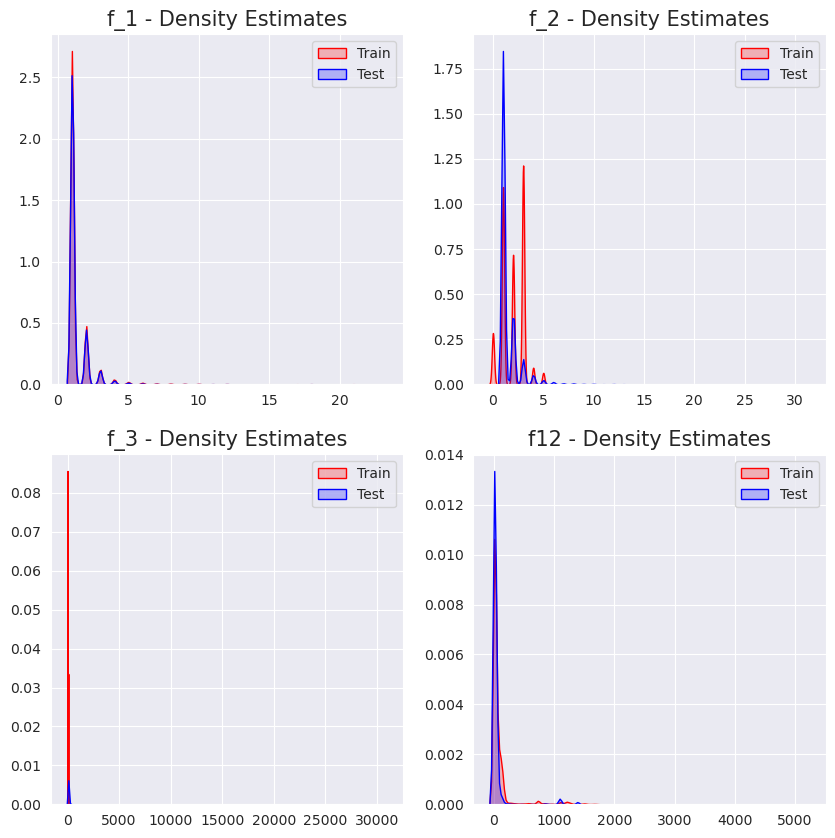

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.set_style('darkgrid')

axs = axs.flatten()

axis_counter = 0

for _, feature in enumerate(cont_variable):
    _ = sns.kdeplot(train[feature], shade=True, color="r", ax=axs[axis_counter], label="Train")
    _ = sns.kdeplot(test[feature], shade=True, color="b", ax=axs[axis_counter], label="Test")
    _ = axs[axis_counter].set_title("{} - Density Estimates".format(feature), fontsize=15)
    _ = axs[axis_counter].set_ylabel("")
    _ = axs[axis_counter].set_xlabel("")
    handles, labels = axs[axis_counter].get_legend_handles_labels()
    axs[axis_counter].legend(handles=handles, labels=labels, title="")   
    axis_counter += 1

In [17]:
train[cont_variable].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
f_1,88832.000000,1.366005,1.136372,1.000000,1.000000,1.000000,1.000000,23.000000
f_2,88832.000000,1.978668,1.124819,0.000000,1.000000,2.000000,3.000000,5.000000
f_3,88832.000000,21.424633,31.387545,0.000000,2.000000,3.000000,73.000000,73.000000
f12,88832.000000,83.503321,243.036619,0.000000,4.640000,15.820000,59.990000,5168.380000


In [18]:
test[cont_variable].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
f_1,26929.000000,1.311003,0.954326,1.000000,1.000000,1.000000,1.000000,23.000000
f_2,26927.000000,1.478367,1.220768,1.000000,1.000000,1.000000,2.000000,31.000000
f_3,26894.000000,75.708095,196.314317,0.000000,35.000000,55.000000,100.000000,30900.000000
f12,26929.000000,44.886926,190.629765,0.000000,0.000000,5.610000,19.200000,5119.520000


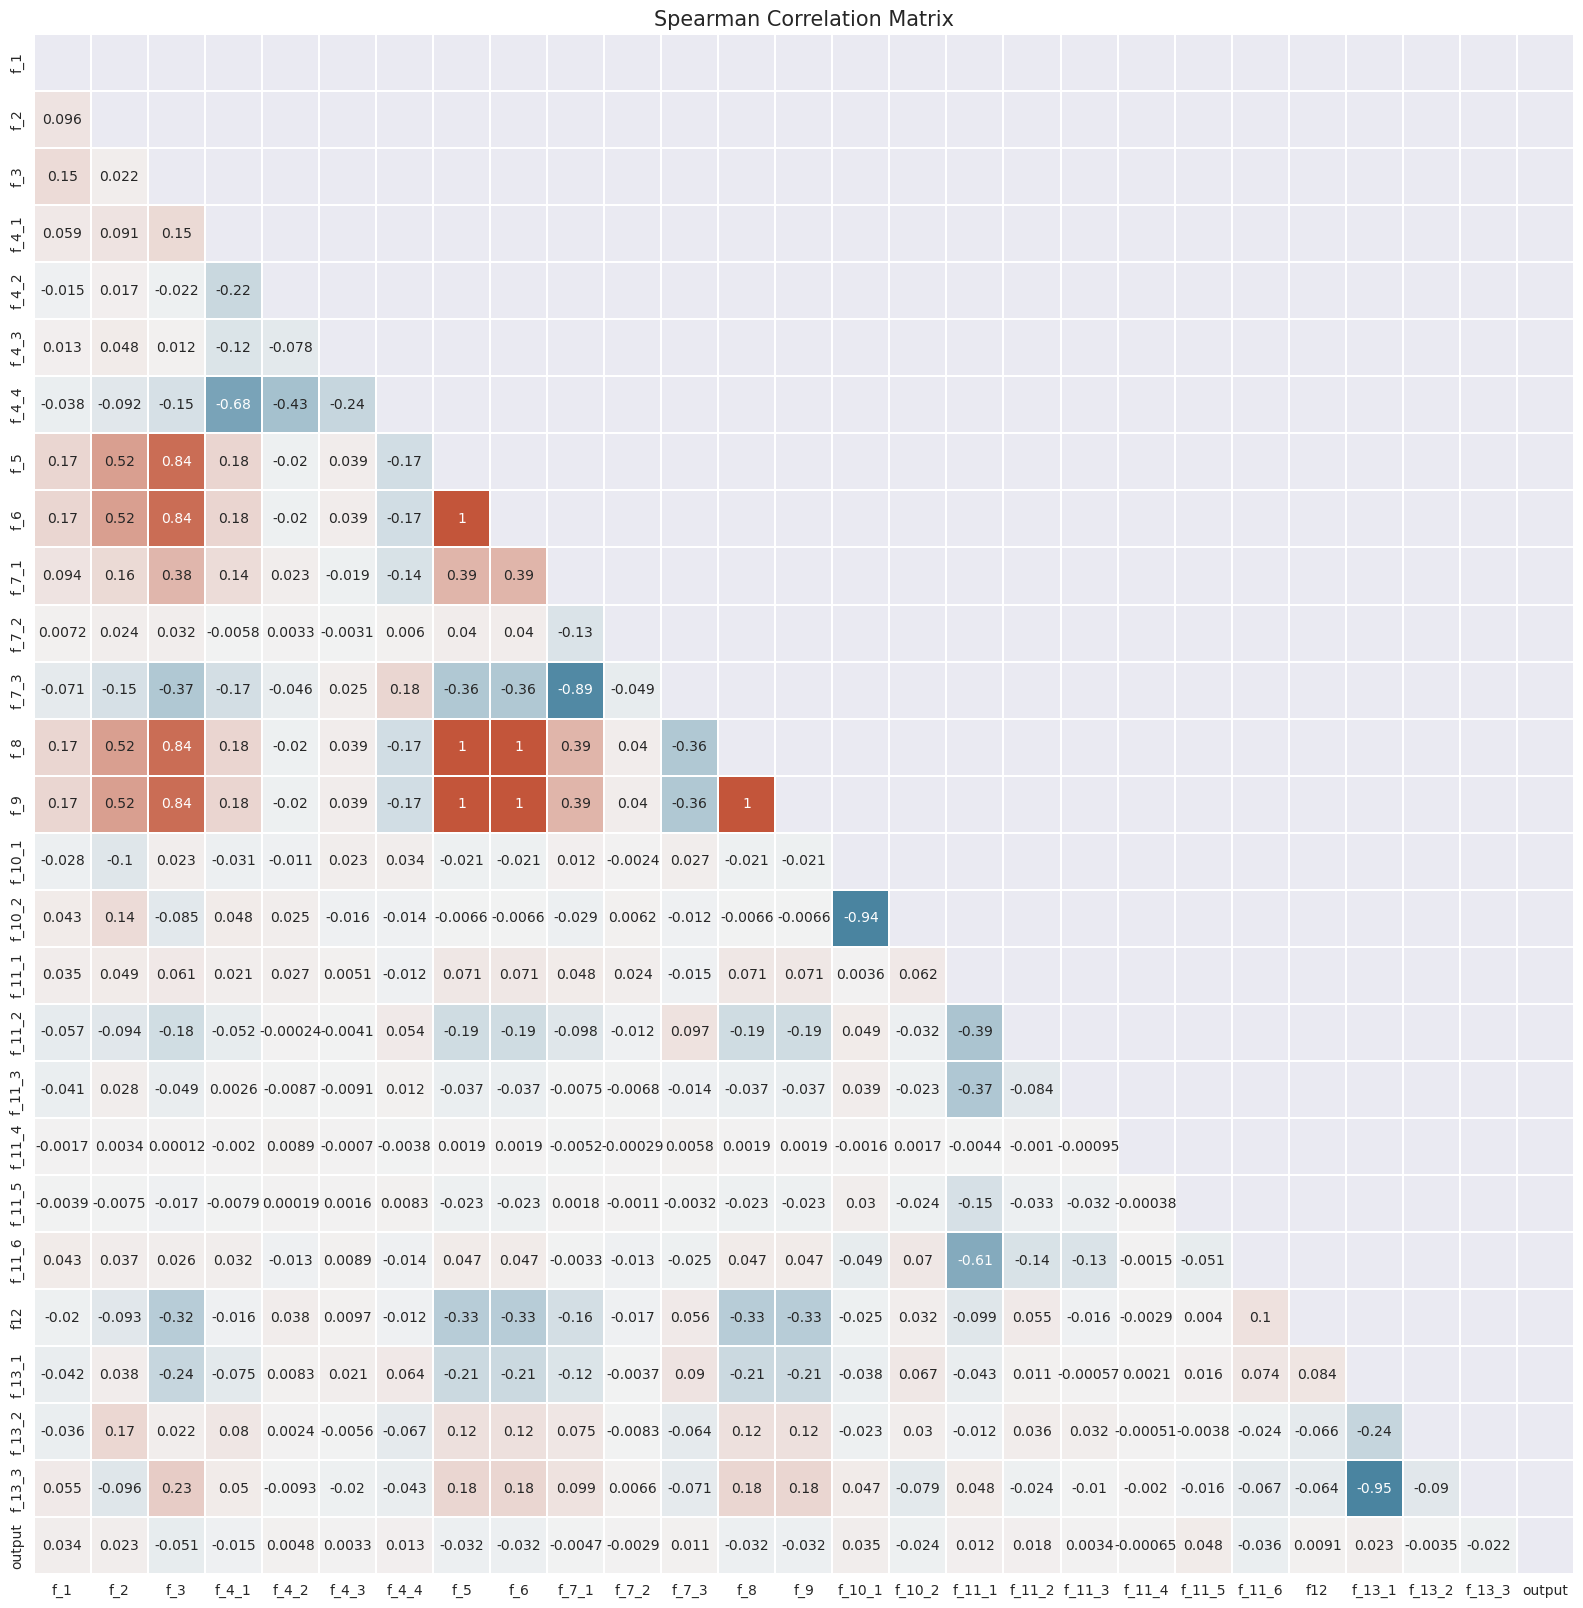

In [19]:

features = train.drop('ID', axis=1).columns

correlation_matrix = train[features].corr(method="spearman")

from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(20, 20))
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Spearman Correlation Matrix", fontsize=15)


In [20]:
FEATURES = [col for col in train.columns if col not in ['id', 'output']]

['f_1', 'f_2', 'f_3', 'f12']

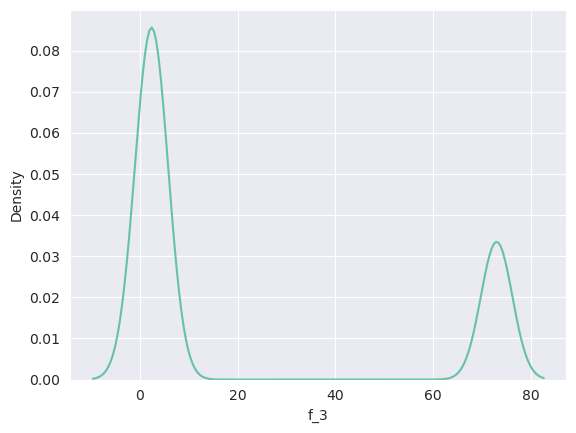

In [21]:
sns.kdeplot(train['f_3'])
cont_variable

Feature distribution of continous features: 


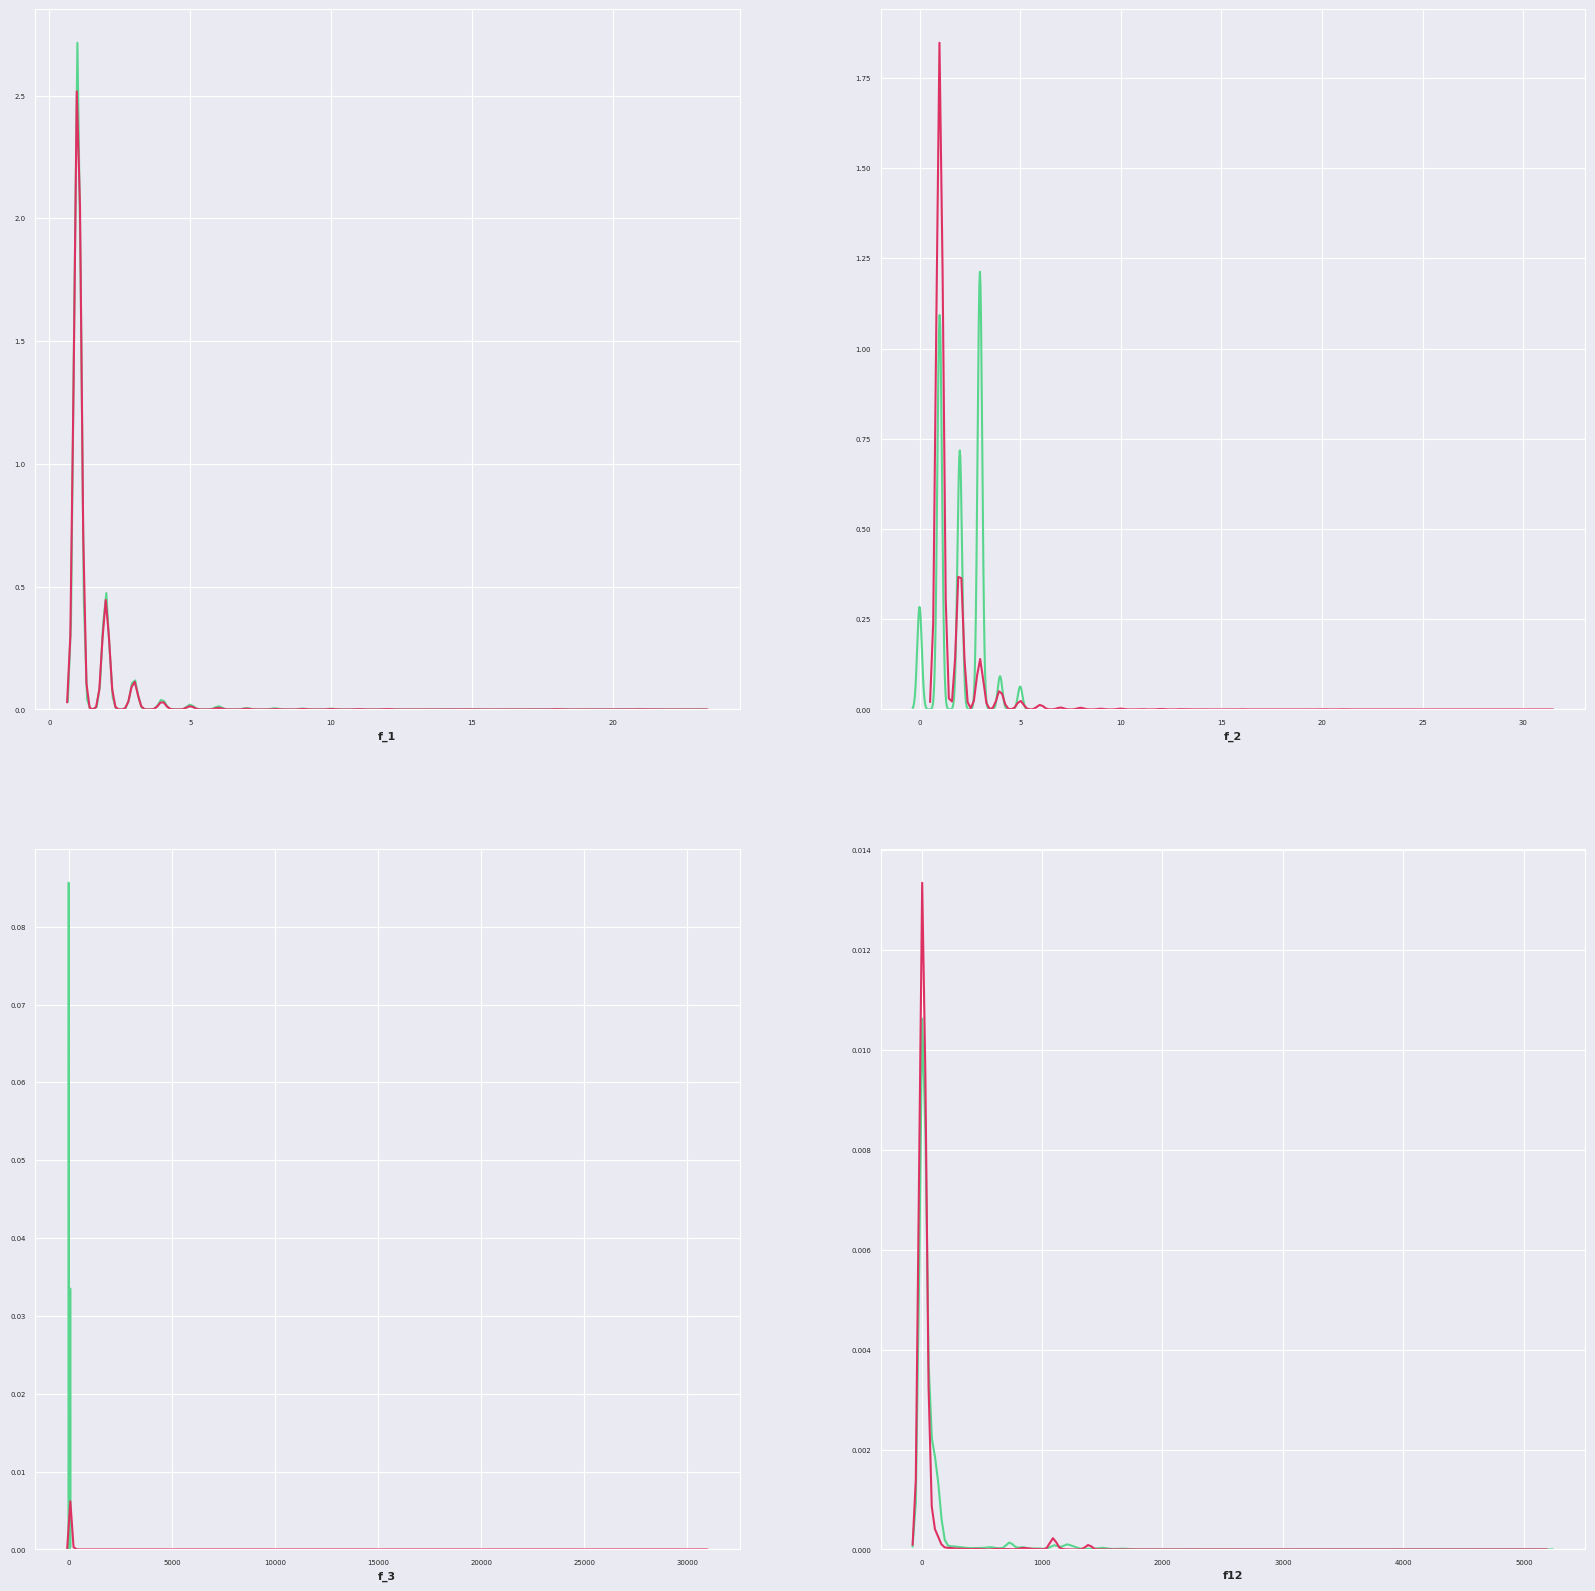

In [23]:
print("Feature distribution of continous features: ")
ncols = 2
nrows = int(len(cont_variable) / ncols + (4 % ncols > 0))

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_variable[r*ncols+c]
        sns.kdeplot(x=train[col], ax=axes[r, c], color='#58D68D', label='Train data') #green
        sns.kdeplot(x=test[col], ax=axes[r, c], color='#DE3163', label='Test data') 
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

# Assumptions
age, gender, known or unknown, how they came to knwo about it, hours looked at house, day or month of the year, day since they saw, whether booking was made
